In [ ]:
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator, image
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from keras.models import  Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os

In [ ]:
train_data = '/content/drive/MyDrive/Tien/Tiền/train'
test_data =  '/content/drive/MyDrive/Tien/Tiền/test'
val_data  =  '/content/drive/MyDrive/Tien/Tiền/validation'

In [ ]:
from keras.engine.data_adapter import train_validation_split

In [ ]:
data_scale = ImageDataGenerator(rescale=1. / 255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
train_input = data_scale.flow_from_directory(train_data,target_size=(120, 120),batch_size=32,class_mode="categorical")
test_input = data_scale.flow_from_directory(test_data,target_size=(120, 120),batch_size=32,class_mode="categorical")
val_input = data_scale.flow_from_directory(val_data,target_size=(120, 120),batch_size=32,class_mode="categorical")

Found 39 images belonging to 11 classes.
Found 11 images belonging to 11 classes.
Found 78 images belonging to 11 classes.


In [ ]:
class_name = ['200', '500', '1000', '2000', '5000', '10000', '20000', '50000', '100000', '200000','500000']

In [ ]:
print("labels: ", class_name)
print("match class: ", train_input.class_indices)
print("Tổng cộng số loại tiền giấy: ",train_input.num_classes)

labels:  ['200', '500', '1000', '2000', '5000', '10000', '20000', '50000', '100000', '200000', '500000']
match class:  {'100k': 0, '10k': 1, '1k': 2, '200 đồng': 3, '200k': 4, '20k': 5, '2k': 6, '500 đồng': 7, '500k': 8, '50k': 9, '5k': 10}
Tổng cộng số loại tiền giấy:  11


In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(120,120,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

In [ ]:
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(11,activation='softmax'))  
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 60, 60, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
money_train = model.fit(train_input,batch_size=30,epochs=50,verbose=1,validation_data=val_input)

Epoch 1/50
2/2 [==============================] - 8s 5s/step - loss: 7.9902 - accuracy: 0.0769 - val_loss: 9.3866 - val_accuracy: 0.1282
Epoch 2/50
2/2 [==============================] - 6s 4s/step - loss: 14.6970 - accuracy: 0.3333 - val_loss: 3.3415 - val_accuracy: 0.0769
Epoch 3/50
2/2 [==============================] - 6s 4s/step - loss: 7.3161 - accuracy: 0.1538 - val_loss: 2.5302 - val_accuracy: 0.0769
Epoch 4/50
2/2 [==============================] - 6s 4s/step - loss: 4.0678 - accuracy: 0.1795 - val_loss: 2.3489 - val_accuracy: 0.0769
Epoch 5/50
2/2 [==============================] - 6s 5s/step - loss: 1.6309 - accuracy: 0.3333 - val_loss: 2.3601 - val_accuracy: 0.1026
Epoch 6/50
2/2 [==============================] - 5s 5s/step - loss: 1.9254 - accuracy: 0.3077 - val_loss: 2.3769 - val_accuracy: 0.1282
Epoch 7/50
2/2 [==============================] - 6s 4s/step - loss: 1.9060 - accuracy: 0.3077 - val_loss: 2.3707 - val_accuracy: 0.1282
Epoch 8/50
2/2 [========================

In [ ]:
model.save('/content/drive/MyDrive/Baitap_AI/tien_VN/money.h5')

array([9])

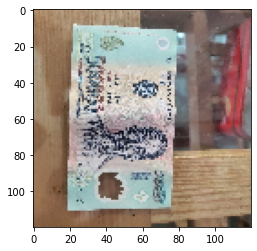

In [ ]:
pic = image.load_img('/content/drive/MyDrive/Tien/Tiền/test/500k/8afaa907b8ba79e420ab308.jpg', target_size=(120,120)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,120,120,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

In [ ]:
guess=np.argmax(model.predict(pic), axis=1)

In [ ]:
if guess[0]==0:
  print("Loai tien: 1000")
if guess[0]==1:
  print("Loai tien: 10000")
if guess[0]==2:
  print("Loai tien: 100000")
if guess[0]==3:
  print("Loai tien: 200")
if guess[0]==4:
  print("Loai tien: 2000")
if guess[0]==5:
  print("Loai tien: 20000")
if guess[0]==6:
  print("Loai tien: 200000")
if guess[0]==7:
  print("Loai tien: 500")
if guess[0]==8:
  print("Loai tien: 50000")
if guess[0]==9:
  print("Loai tien: 500000")
if guess[0]==10:
  print("Loai tien: 5000")

Loai tien: 500000
